### RESEARCH ON DATA FROM https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset


#### IMPORTED PACKAGES

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### UTIL FUNCTIONS

In [101]:
def print_df(df):
    with pd.option_context("display.max_columns", None):
        display(df.head(2))
        
def random_color():
    return "#" + "".join(random.choice("0123456789ABCDEF") for _ in range(6))

#### DATA LOADING AND BASIC PREPROCESSING

In [162]:
# suppress warnings
meta_data_df = pd.read_csv("../data/movies_metadata.csv", low_memory=False)

# convert the popularity to numeric values, NaN (missing values) if can't convert
meta_data_df["popularity"] = pd.to_numeric(meta_data_df["popularity"], errors="coerce")

In [163]:
print_df(meta_data_df)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [164]:
meta_data_df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

- Drop meaningless columns

In [165]:
dropped_columns =  ["homepage", "imdb_id", "poster_path", "status", "tagline"]
meta_data_df = meta_data_df.drop(columns=dropped_columns)

In [166]:
meta_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   id                     45466 non-null  object 
 5   original_language      45455 non-null  object 
 6   original_title         45466 non-null  object 
 7   overview               44512 non-null  object 
 8   popularity             45460 non-null  float64
 9   production_companies   45463 non-null  object 
 10  production_countries   45463 non-null  object 
 11  release_date           45379 non-null  object 
 12  revenue                45460 non-null  float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  ti

- na sum

In [167]:
meta_data_df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
original_title               0
overview                   954
popularity                   6
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

- Adult: convert to true/false value and remove noise

In [168]:
meta_data_df["adult"].value_counts()

meta_data_df["adult"] = meta_data_df["adult"].astype(str).str.strip().str.lower()

meta_data_df["adult"] = meta_data_df["adult"].map({
    "true": True,
    "false": False
})

meta_data_df["adult"] = meta_data_df["adult"].fillna(True)

/tmp/ipykernel_12160/3446648582.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  meta_data_df["adult"] = meta_data_df["adult"].fillna(True)


#### VISUALISE THE DATA

- budget: Most of the values are 0

In [169]:
meta_data_df["budget"].value_counts()

budget
0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
12200000        1
65700           1
64200           1
707503          1
8620000         1
Name: count, Length: 1226, dtype: int64

- revenue: Most of the revenue are 0

In [170]:
meta_data_df["revenue"].value_counts()

revenue
0.0           38052
12000000.0       20
11000000.0       19
10000000.0       19
2000000.0        18
              ...  
100000.0          1
15073942.0        1
2807854.0         1
1942423.0         1
23833131.0        1
Name: count, Length: 6863, dtype: int64

- genre

In [171]:
meta_data_df["genres"].value_counts()

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                                                            5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                           3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                      2723
[]                                                                                                                                                                       2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                          1301
                                                                                                                           

- popularity values

In [172]:
meta_data_df["popularity"].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [48]:
(meta_data_df["popularity"] > 30).sum()

np.int64(111)

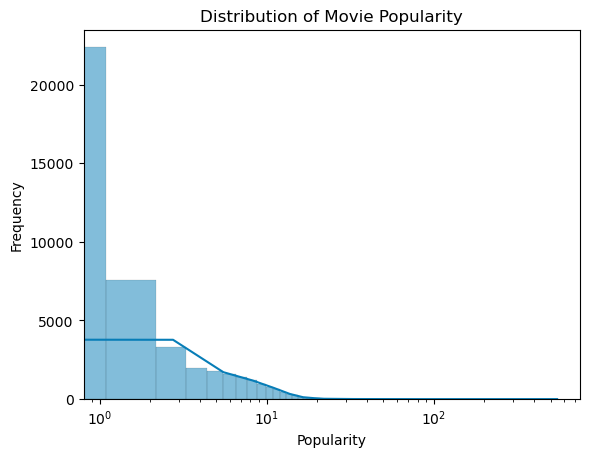

In [157]:
sns.histplot(meta_data_df["popularity"], bins=500, kde=True, color=random_color())

plt.xscale("log")
plt.title("Distribution of Movie Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


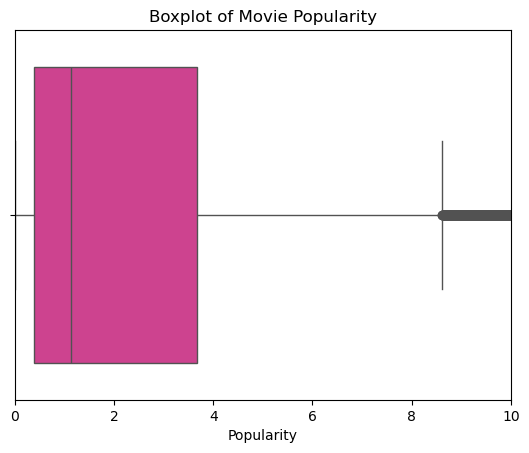

In [114]:
sns.boxplot(x=meta_data_df["popularity"], color=random_color())
plt.xlim((0, 10))
plt.title("Boxplot of Movie Popularity")
plt.xlabel("Popularity")
plt.show()


- runtime of the movies

In [174]:
meta_data_df["runtime"].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

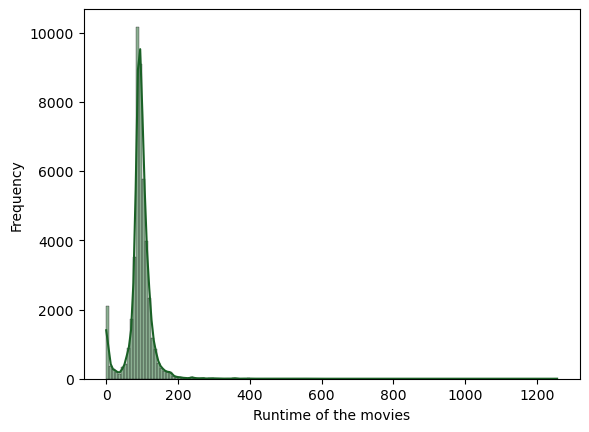

In [182]:
sns.histplot(data=meta_data_df, x="runtime", color=random_color(), bins=150, kde=True)

plt.xlabel("Runtime of the movies")
plt.ylabel("Frequency")
plt.show()

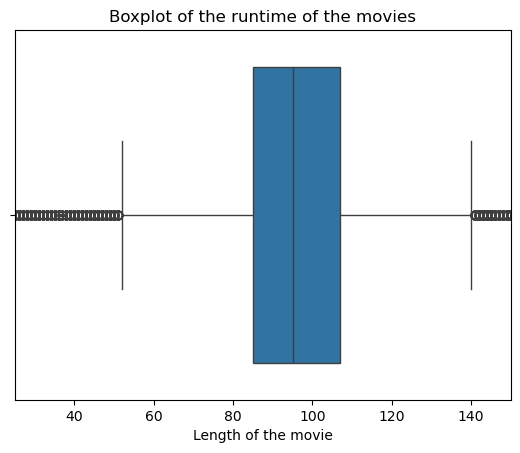

In [186]:
sns.boxplot(data=meta_data_df, x="runtime")

plt.xlim((25, 150))
plt.xlabel("Length of the movie")
plt.title("Boxplot of the runtime of the movies")
plt.show()

- vote average: nearly normally distributed with mean 5.6?

In [80]:
meta_data_df["vote_average"].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

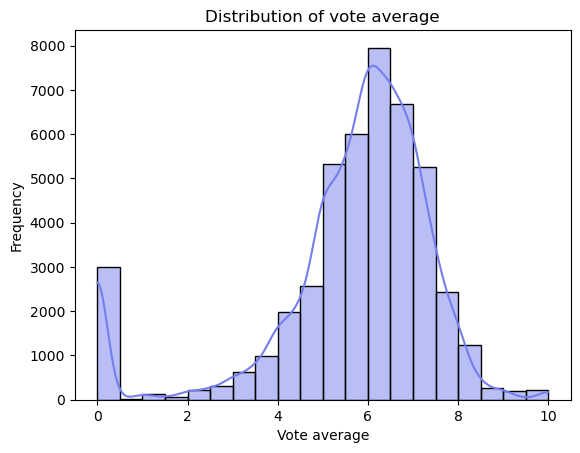

In [115]:
sns.histplot(meta_data_df["vote_average"], bins=20, kde=True, color=random_color())

plt.title("Distribution of vote average")
plt.xlabel("Vote average")
plt.ylabel("Frequency")
plt.show()

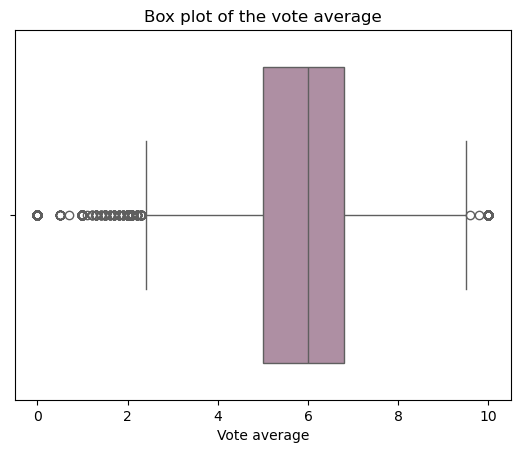

In [116]:
sns.boxplot(x=meta_data_df["vote_average"], color=random_color())

plt.xlabel("Vote average")
plt.title("Box plot of the vote average")
plt.show()

- vote_count, not so usefull as the number of vote is too small

In [83]:
meta_data_df["vote_count"].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [131]:
(meta_data_df["vote_count"] > 100).sum()

np.int64(6020)

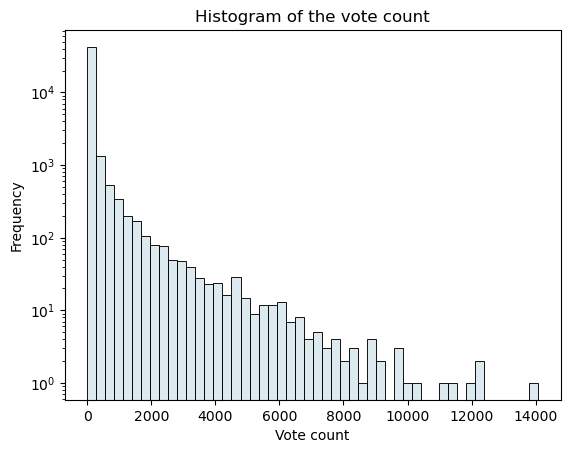

In [151]:
sns.histplot(data=meta_data_df, x="vote_count", bins=50, color=random_color())

plt.yscale("log")
plt.xlabel("Vote count")
plt.ylabel("Frequency")
plt.title("Histogram of the vote count")
plt.show()

- Most movies have very few votes, but some have high votes 10000

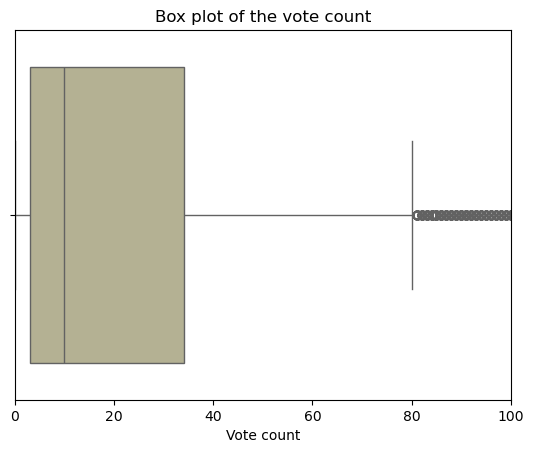

In [130]:
sns.boxplot(data=meta_data_df, x="vote_count", color=random_color())

plt.xlim((0, 100))
plt.xlabel("Vote count")
plt.title("Box plot of the vote count")
plt.show()